# Ecommerce_Data_analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
ds= pd.read_excel("Superstore_USA.xlsx")

In [8]:
ds.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [9]:
ds.shape

(9426, 24)

# MISSING DATA ANALYSIS

In [18]:
ds.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Fixing the missing the data

In [19]:
ds['Product Base Margin'].fillna(ds['Product Base Margin'].mean(), inplace=True)


In [37]:
ds['Order Priority'].value_counts()

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: Order Priority, dtype: int64

In [47]:
#ds['Order Priority']

In [36]:
#ds['Order Priority'] = ds['Order Priority'].replace('Critical ', 'Critical')

# What is the distribution of Order Priority across all orders

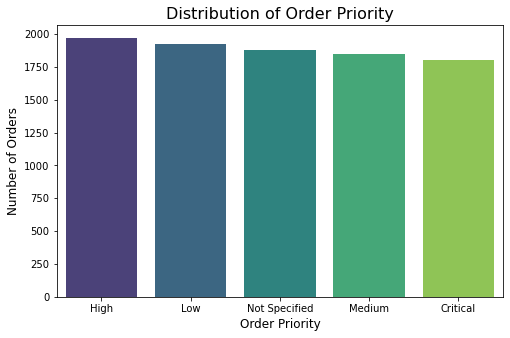

In [44]:
order_count = ds['Order Priority'].value_counts()

# Create the barplot
plt.figure(figsize=(8,5))
sns.barplot(x=order_count.index, y=order_count.values, palette='viridis')

# Add titles and labels
plt.title('Distribution of Order Priority', fontsize=16)
plt.xlabel('Order Priority', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

# Which product has the highest average base margin across all orders

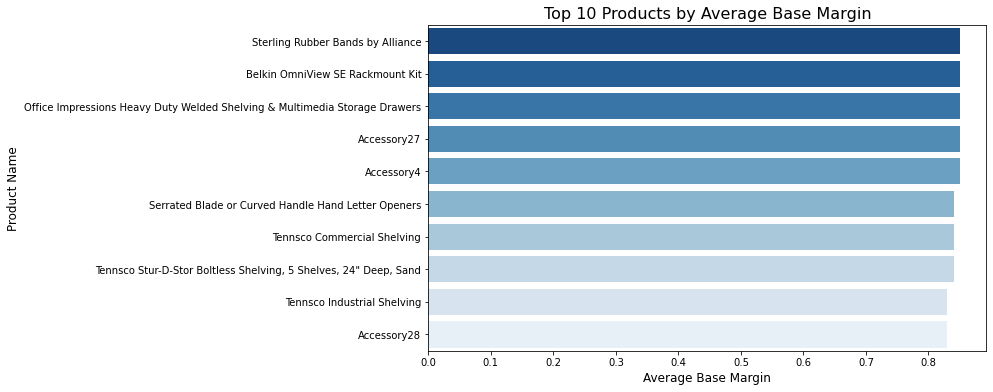

In [49]:
product_margin = ds.groupby('Product Name')['Product Base Margin'].mean().sort_values(ascending=False).head(10)

# Plot the top 10 products with highest base margins
plt.figure(figsize=(10,6))
sns.barplot(x=product_margin.values, y=product_margin.index, palette='Blues_r')

# Add titles and labels
plt.title('Top 10 Products by Average Base Margin', fontsize=16)
plt.xlabel('Average Base Margin', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

# What is the relationship between Order Priority and Profit? Do higher priority orders result in higher profits?

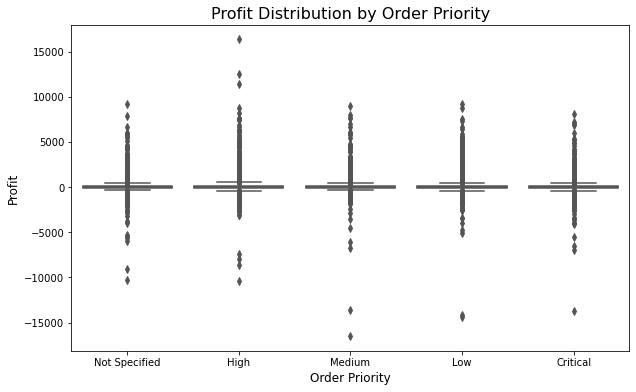

In [50]:
# Boxplot of profits based on order priority
plt.figure(figsize=(10,6))
sns.boxplot(x='Order Priority', y='Profit', data=ds, palette='muted')

# Add titles and labels
plt.title('Profit Distribution by Order Priority', fontsize=16)
plt.xlabel('Order Priority', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.show()

# Can you find the top 5 cities that generate the most revenue for Critical order priorities? Additionally, visualize the total sales for these cities.


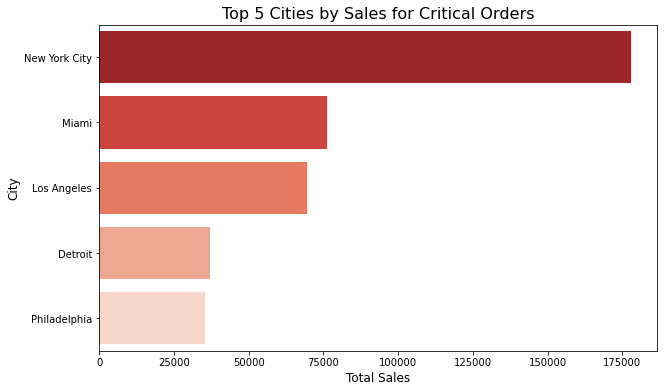

In [51]:
critical_orders = ds[ds['Order Priority'] == 'Critical']

# Group by city and sum the sales
top_cities = critical_orders.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)

# Plot the top 5 cities with highest sales for 'Critical' orders
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')

# Add titles and labels
plt.title('Top 5 Cities by Sales for Critical Orders', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

# Create a heatmap showing the correlation between numerical variables (e.g., Sales, Profit, Shipping Cost) to determine which variables are most related to profitability.


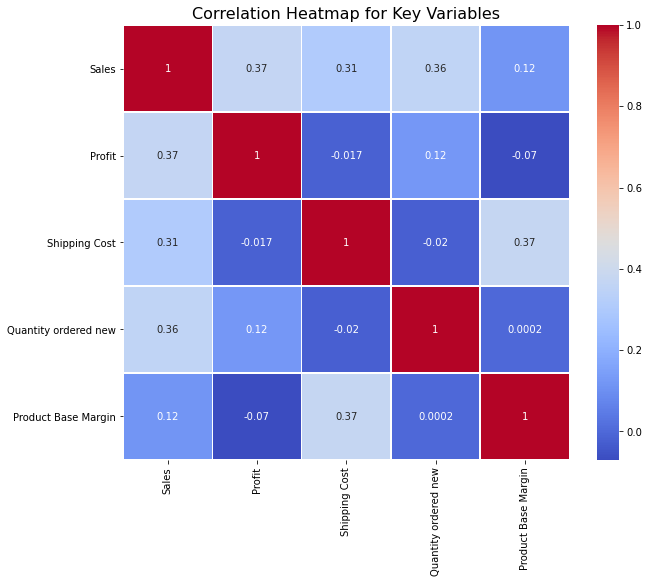

In [52]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,8))
correlation_matrix = ds[['Sales', 'Profit', 'Shipping Cost', 'Quantity ordered new', 'Product Base Margin']].corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap for Key Variables', fontsize=16)
plt.show()


# What is the average shipping cost for orders of each Product Category? Which categories are the most expensive to ship?

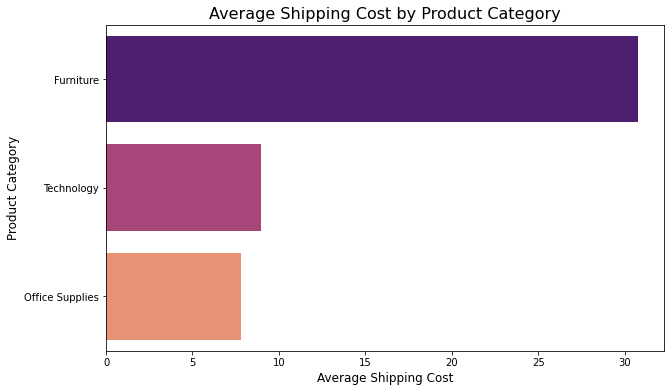

In [53]:
# Calculate the mean shipping cost for each product category
category_shipping_cost = ds.groupby('Product Category')['Shipping Cost'].mean().sort_values(ascending=False)

# Plot the average shipping cost by product category
plt.figure(figsize=(10,6))
sns.barplot(x=category_shipping_cost.values, y=category_shipping_cost.index, palette='magma')

# Add titles and labels
plt.title('Average Shipping Cost by Product Category', fontsize=16)
plt.xlabel('Average Shipping Cost', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()


# Which Customer Segment contributes the most to total sales, and how does their contribution vary across different regions

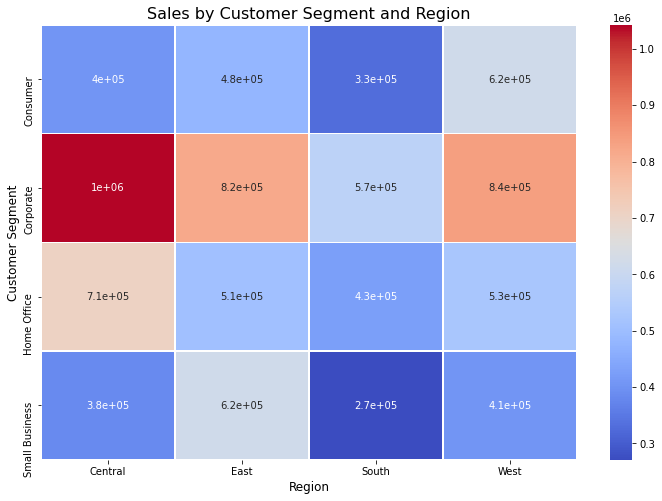

In [54]:
# Group by customer segment and region, and sum the sales
segment_region_sales = ds.groupby(['Customer Segment', 'Region'])['Sales'].sum().unstack()

# Plotting a heatmap of sales by customer segment and region
plt.figure(figsize=(12,8))
sns.heatmap(segment_region_sales, annot=True, cmap='coolwarm', linewidths=0.5)

# Add titles and labels
plt.title('Sales by Customer Segment and Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Customer Segment', fontsize=12)
plt.show()


# What is the relationship between Quantity Ordered and Sales for the top 10 products? Do products with higher quantities ordered tend to generate higher sales?

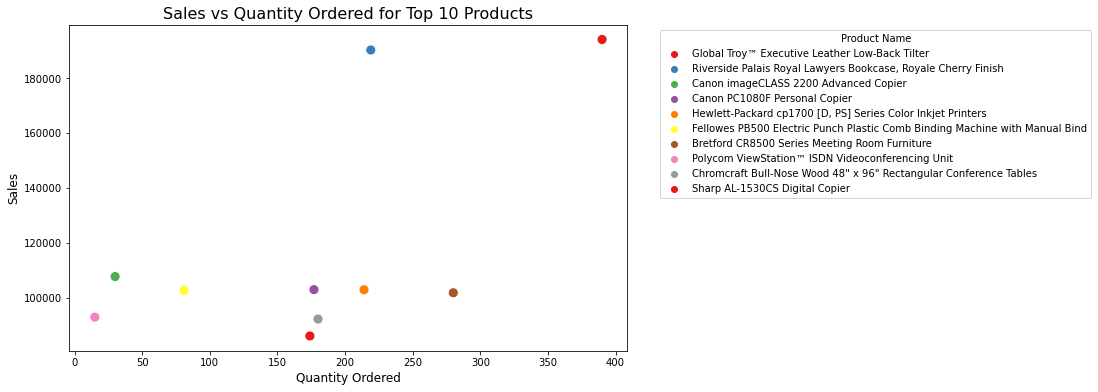

In [55]:
# Calculate total sales and quantity ordered for the top 10 products
top_10_products = ds.groupby('Product Name').agg({'Sales': 'sum', 'Quantity ordered new': 'sum'}).sort_values(by='Sales', ascending=False).head(10)

# Plot sales vs quantity ordered for top 10 products
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity ordered new', y='Sales', data=top_10_products, hue=top_10_products.index, palette='Set1', s=100)

# Add titles and labels
plt.title('Sales vs Quantity Ordered for Top 10 Products', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Summary:
This summary provides insights gained from the analysis of an e-commerce dataset. The key focus areas were product performance, shipping costs, customer segments, and order priority.